In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
pd.read_csv('email_campaigns.csv')

,CampaignID,SendDate,SendHour,AudienceSize,Subject,TopKeywords,OpenRate,ClickRate,ConversionRate,DeviceType,CustomerSegment,CampaignType
0,CMP11935,2025-07-10,21,1000,must-have — offres limitées aujourd’hui,"coulisses, tendances, incontournable, édition ...",16.2,1.31,0.00,Mobile,Returning,Newsletter
1,CMP16494,2023-10-14,10,1000,commande : jusqu’à 10% de remise !,"sauvegardé, disponible, attention, vérifiez, v...",23.33,3.09,0.00,Mobile,Returning,Reminder
2,CMP11720,2023-10-19,8,10000,innovation pour vous — 6 jours seulement,"must-have, newsletter, collaboration, story, t...",0.5,2.71,0.00,Mobile,Inactive,Newsletter
3,CMP19120,2024-12-15,9,2000,promo : découvrez nos nouveautés,"client, craquez, exceptionnelle, gagnez, deal,...",10.84,1.61,0.00,Mobile,Inactive,Promotion
4,CMP10360,2023-11-16,5,2000,avantage — livraison gratuite,"prix, pack, soldes, essai, anniversaire, rabais",3.84,0.71,0.00,Desktop,New,Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,CMP21964,2023-04-27,17,2000,exception sur nos best-sellers,"pack, craquez, stock, bonus, remise, équipe",20.06,2.78,0.00,Mobile,Returning,Promotion
11996,CMP15191,2025-02-28,21,5000,collaboration : nos clients adorent,"éditorial, innovation, sélection, créatif, act...",9.89,0.93,0.00,Desktop,New,Newsletter
11997,CMP15390,2024-01-17,20,1000,cadeau : jusqu’à 15% de remise ! ❤️,"automne, chaud, fin d’année, été, partage, hiver",18.19,2.06,0.79,Desktop,Inactive,Seasonal
11998,CMP10860,2023-08-06,16,2000,plaisir : nos clients adorent,"cyber monday, édition, magie, soleil, famille,...",12.84,0.91,0.00,Mobile,Inactive,Seasonal


Présentation et description des données

In [4]:
# Chargement des données
df = pd.read_csv('email_campaigns.csv')
# Aperçu des données
print("Dimensions du dataset:", df.shape)
print("\nTypes de données:")
print(df.dtypes)
print("\nAperçu des premières lignes:")
print(df.head())

Dimensions du dataset: (12000, 12)

Types de données:
CampaignID          object
SendDate            object
SendHour             int64
AudienceSize         int64
Subject             object
TopKeywords         object
OpenRate            object
ClickRate           object
ConversionRate     float64
DeviceType          object
CustomerSegment     object
CampaignType        object
dtype: object

Aperçu des premières lignes:
  CampaignID    SendDate  SendHour  AudienceSize  \
0   CMP11935  2025-07-10        21          1000   
1   CMP16494  2023-10-14        10          1000   
2   CMP11720  2023-10-19         8         10000   
3   CMP19120  2024-12-15         9          2000   
4   CMP10360  2023-11-16         5          2000   

                                    Subject  \
0   must-have — offres limitées aujourd’hui   
1        commande : jusqu’à 10% de remise !   
2  innovation pour vous — 6 jours seulement   
3          promo : découvrez nos nouveautés   
4             avantage — livra

Statistique déscriptive

In [5]:
# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques:")
print(df.describe())


Statistiques descriptives des variables numériques:
           SendHour  AudienceSize  ConversionRate
count  12000.000000  12000.000000    12000.000000
mean      11.409417   3600.083333        0.271348
std        6.902748   4719.786156        0.346319
min        0.000000    500.000000        0.000000
25%        5.000000   1000.000000        0.000000
50%       11.000000   2000.000000        0.110000
75%       17.000000   5000.000000        0.470000
max       23.000000  20000.000000        2.120000


Cleaning

In [6]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())
# Conversion des dates
df['SendDate'] = pd.to_datetime(df['SendDate'], errors='coerce')

# Supprimer les lignes avec des dates invalides
df = df.dropna(subset=['SendDate'])
print("\nDonnées nettoyées. Dimensions:", df.shape)


Valeurs manquantes par colonne:
CampaignID         0
SendDate           0
SendHour           0
AudienceSize       0
Subject            0
TopKeywords        0
OpenRate           0
ClickRate          0
ConversionRate     0
DeviceType         0
CustomerSegment    0
CampaignType       0
dtype: int64

Données nettoyées. Dimensions: (12000, 12)


2 Analyseunivariée pour chaque variable quantitative/qualitative

 Stats pour SendHour
count    12000.000000
mean        11.409417
std          6.902748
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: SendHour, dtype: float64


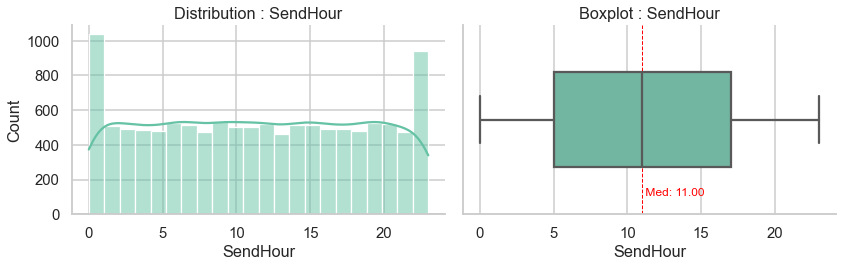

 Stats pour AudienceSize
count    12000.000000
mean      3600.083333
std       4719.786156
min        500.000000
25%       1000.000000
50%       2000.000000
75%       5000.000000
max      20000.000000
Name: AudienceSize, dtype: float64


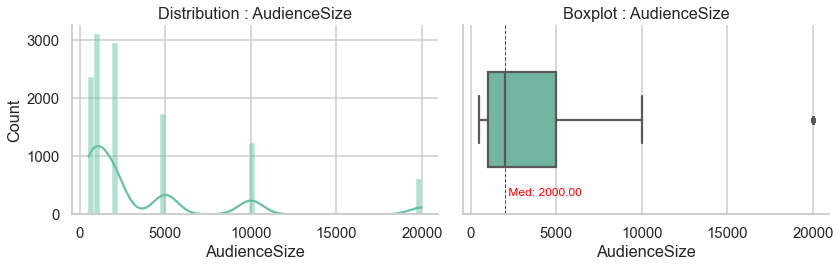

 Stats pour OpenRate
count    11999.000000
mean        15.513949
std          7.864132
min          0.500000
25%          9.855000
50%         15.160000
75%         20.865000
max         47.370000
Name: OpenRate, dtype: float64


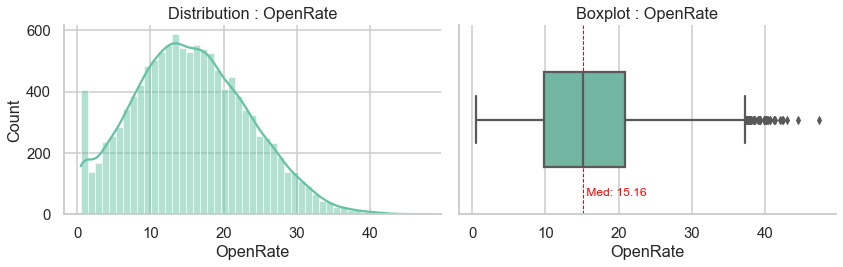

 Stats pour ClickRate
count    11997.000000
mean         1.995652
std          1.661620
min          0.100000
25%          0.460000
50%          1.750000
75%          3.090000
max          8.840000
Name: ClickRate, dtype: float64


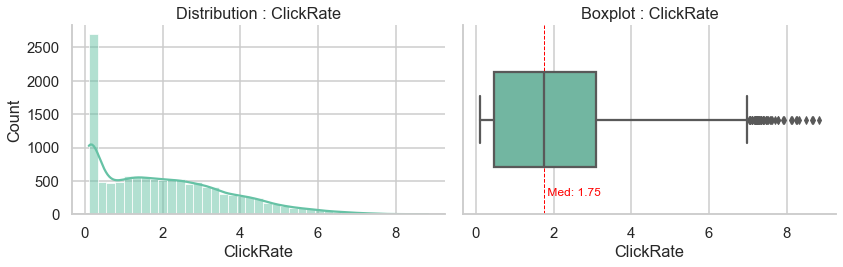

 Stats pour ConversionRate
count    12000.000000
mean         0.271348
std          0.346319
min          0.000000
25%          0.000000
50%          0.110000
75%          0.470000
max          2.120000
Name: ConversionRate, dtype: float64


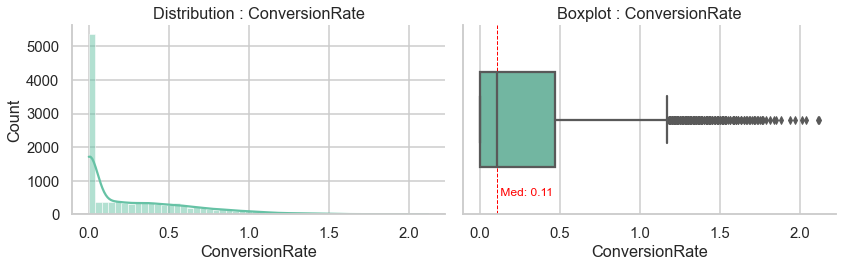


Répartition : DeviceType


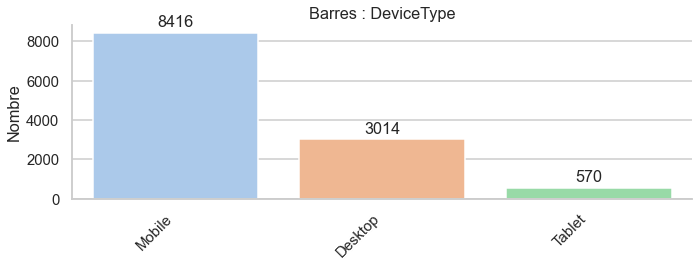


Répartition : CustomerSegment


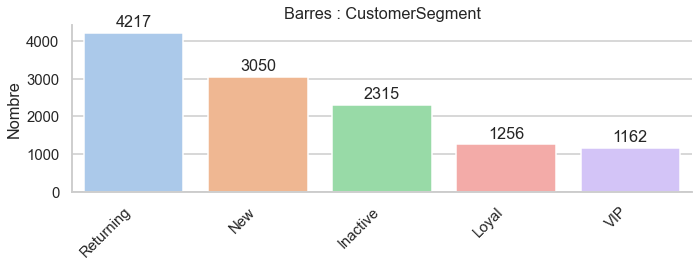


Répartition : CampaignType


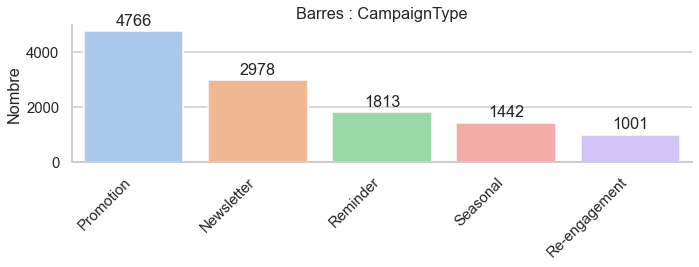

In [20]:
# Config globale
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)

# Identification des variables quantitatives et qualitatives
quantitative_vars = ['SendHour', 'AudienceSize', 'OpenRate', 'ClickRate', 'ConversionRate']
qualitative_vars = ['DeviceType', 'CustomerSegment', 'CampaignType']
# Analyse des variables quantitatives
for col in quantitative_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f" Stats pour {col}")
    print(df[col].describe())

    # Création figure & 2 sous-graphes
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(12, 4))
    
    # couleur
    color = "#66c2a5"

    # Histogramme
    sns.histplot(df[col].dropna(), kde=True, color=color, ax=ax_hist)
    ax_hist.set(title=f'Distribution : {col}', xlabel=col)
    
    # Boxplot
    sns.boxplot(x=df[col], color=color, width=0.5, ax=ax_box)
    ax_box.set(title=f'Boxplot : {col}', xlabel=col)
    
    # Ajout médiane
    med = df[col].median()
    ax_box.axvline(med, color='red', linestyle='--', linewidth=1)
    ax_box.text(med, 0.1, f' Med: {med:.2f}', color='red', ha='left', fontsize=12,
                transform=ax_box.get_xaxis_transform())

    sns.despine()
    plt.tight_layout()
    plt.show()

# Analyse des variables qualitatives
for col in qualitative_vars:
    print(f"\nRépartition : {col}")
    counts = df[col].value_counts()
    
    plt.figure(figsize=(10, 4))
    
    # Barplot
    ax = sns.barplot(x=counts.index, y=counts.values, palette="pastel")
    ax.bar_label(ax.containers[0], padding=3)
    
    ax.set(title=f'Barres : {col}', ylabel='Nombre')
    plt.xticks(rotation=45, ha='right')
    
    sns.despine()
    plt.tight_layout()
    plt.show()

In [23]:
import plotly.express as px

# Analyse des variables qualitatives (Version Interactive avec Plotly)
for col in qualitative_vars:
    print(f"\nRépartition : {col}")
    
    # Plotly préfère travailler avec des DataFrames propres
    # On reset_index pour avoir des colonnes nommées
    df_counts = df[col].value_counts().reset_index()
    df_counts.columns = [col, 'Count']
    
    # Création du graph interactif
    fig = px.bar(df_counts, x=col, y='Count',
                 title=f'Répartition : {col}',
                 text_auto=True,  # Affiche les chiffres automatiquement sur les barres
                 color=col,       # Colore les barres
                 color_discrete_sequence=px.colors.qualitative.Pastel) # Palette Pastel
    
    # Mise en page propre (Style "Whitegrid" équivalent)
    fig.update_layout(showlegend=False, 
                      template="plotly_white",
                      xaxis_title=col,
                      yaxis_title="Nombre")
    
    fig.show()


Répartition : DeviceType



Répartition : CustomerSegment



Répartition : CampaignType
